# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
import numpy as np


class Graph_Custom (Graph_MCMC):

    def get_feature_names(self):
        feature_name_map = self.G.graph_properties["feat_names"]
        names = []

        for i in range(0, len(feature_name_map)):
            name = feature_name_map[i]
            name = name.replace(";", "-")
            name = name.replace("anonymized feature ", "")
            names.append(name)
        
        return names


    def generate_feature_matrix(self):
        feat_map = self.G.vertex_properties["feat"]
        feat_names = self.get_feature_names()

        vertices = self.G.get_vertices()
        
        N = len(vertices)
        D = len(feat_names)
        X = np.empty((N, D))

        for vertex_index, vertex_id in enumerate(vertices):
            boolean_vector = feat_map[vertex_id]
            for prop_index in range(0, D):
                X[vertex_index, prop_index] = boolean_vector[prop_index]
        
        return X


In [4]:
graph = Graph_Custom()
graph.read_from_ns("ego_social/facebook_1912") #"soc_net_comms/amazon"

In [5]:
#graph.convert_props_to_flags()
#graph.remove_property("Unknown")

In [6]:
graph.print_info()

Graph with N=747 nodes, E=30025 edges and D=480 vertex features for training


In [7]:
graph.list_props()

name            (graph)   (type: string, val: ego_social (facebook_1912))
description     (graph)   (type: string, val: Ego networks associated with a
                                              set of accounts of three social
                                              media platforms (Facebook,
                                              Google+, and Twitter). Datasets
                                              include node features (profile
                                              metadata), circles, and ego
                                              networks, and were crawled from
                                              public sources in 2012)
citation        (graph)   (type: string, val: ['J. McAuley and J. Leskovec.
                                              "Learning to Discover Social
                                              Circles in Ego Networks." NIPS
                                              (2012). arxiv:1210.8182,
                      

In [8]:
graph.partition(B_min=4, B_max=20)

Performing inference...
    B: 12 <- 20    shrinking 20 -> 15
    B: 12 <- 20    B=15  niter:     1  count:    0  breaks:  0  min_S: 48924.401  max_S: 48976.543  S: 48924.401  ΔS:     -52.1421  moves:    11 
    B: 12 <- 20    B=15  niter:     2  count:    0  breaks:  0  min_S: 48889.428  max_S: 48976.543  S: 48889.428  ΔS:     -34.9733  moves:     7 
    B: 12 <- 20    B=15  niter:     3  count:    1  breaks:  1  min_S: 48889.428  max_S: 48976.543  S: 48887.576  ΔS:     -1.85180  moves:     4 
    B: 12 <- 20    shrinking 15 -> 12
    B: 12 <- 20    B=12  niter:     1  count:    0  breaks:  0  min_S: 49425.445  max_S: 49489.262  S: 49425.445  ΔS:     -63.8171  moves:    13 
    B: 12 <- 20    B=12  niter:     2  count:    0  breaks:  0  min_S: 49418.864  max_S: 49489.262  S: 49418.864  ΔS:     -6.58149  moves:     3 
    B: 12 <- 20    B=12  niter:     3  count:    0  breaks:  0  min_S: 49405.430  max_S: 49489.262  S: 49405.430  ΔS:     -13.4333  moves:     3 
    B: 12 <- 20    B=12 

<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f7ebdc6b1f0, at 0x7f7ebb5123d0>

In [9]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:04<00:00, 231.01it/s]


65.0663536881681

Drawing soft partition


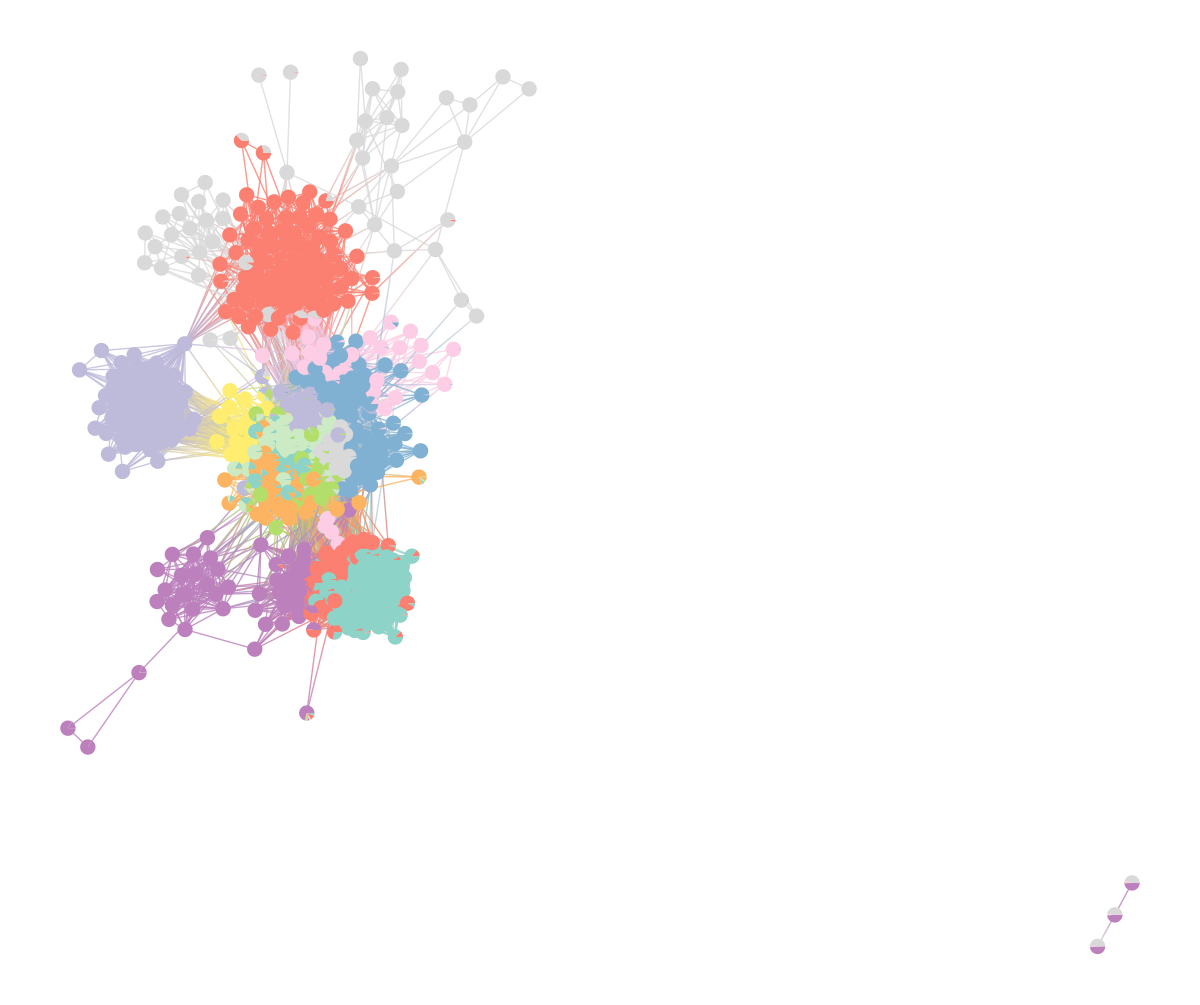

In [10]:
#graph.draw(gen_layout=False, output="school-graph.png")
graph.draw(gen_layout=False, size=7)

In [11]:
graph.plot_matrix()

Drawing block adjacency matrix $e_{rs}$


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

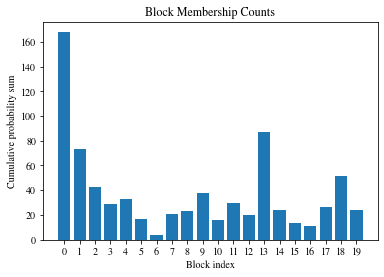

In [12]:
graph.plot_posterior_props()

## Train classifier

In [13]:
classifier = graph.sample_classifier_mala(1000, step_scaling=0.1, verbose=True)

100%|██████████| 1000/1000 [00:15<00:00, 66.44it/s]Sample accept ratio: 41.4%
Train. set accuracy: 43.50736278447122%



## Interpret results

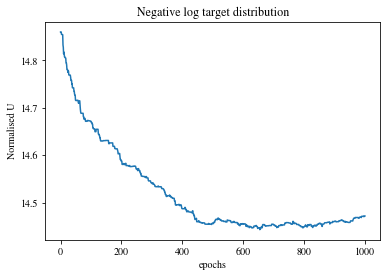

14.520146821527717

In [14]:
classifier.plot_U()

In [15]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

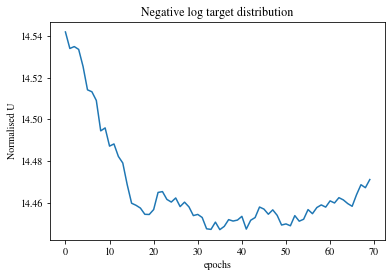

14.467067580268054


In [16]:
u_mean = classifier.plot_U()
print(u_mean)

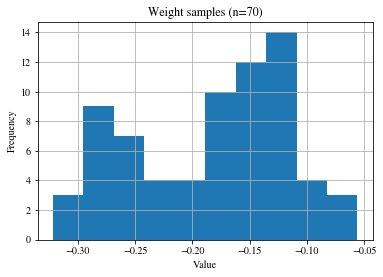

In [17]:
classifier.plot_sample_histogram()

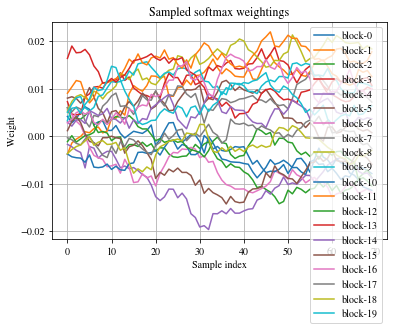

In [18]:
classifier.plot_sample_history()

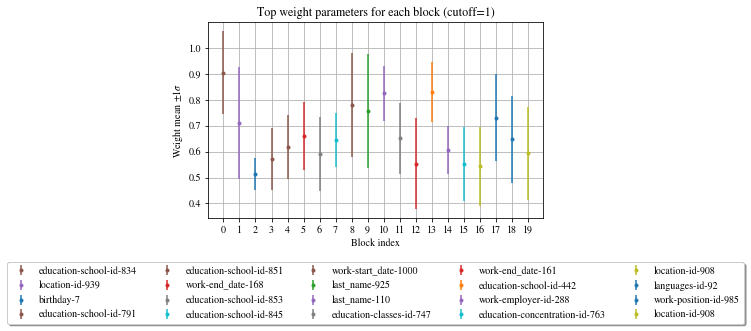

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 0: birthday-729
Discarding feature 1: birthday-730
Discarding feature 2: birthday-731
Discarding feature 3: birthday-732
Discarding feature 4: birthday-1
Discarding feature 5: birthday-2
Discarding feature 6: birthday-210
Discarding feature 7: birthday-4
Discarding feature 9: birthday-6
Discarding feature 11: birthday-377
Discarding feature 12: birthday-378
Discarding feature 13: birthday-733
Discarding feature 14: birthday-734
Discarding feature 15: birthday-735
Discarding feature 16: birthday-736
Discarding feature 17: birthday-737
Discarding feature 18: birthday-738
Discarding feature 19: birthday-739
Discarding feature 20: birthday-740
Discarding feature 21: birthday-741
Discarding feature 23: education-classes-id-743
Discarding feature 24: education-classes-id-744
Discarding feature 25: education-classes-id-745
Discarding feature 26: education-classes-id-746
Discarding feature 28: education-classes-id-748
Discarding feature 29: education-classes-id-749
Discardin

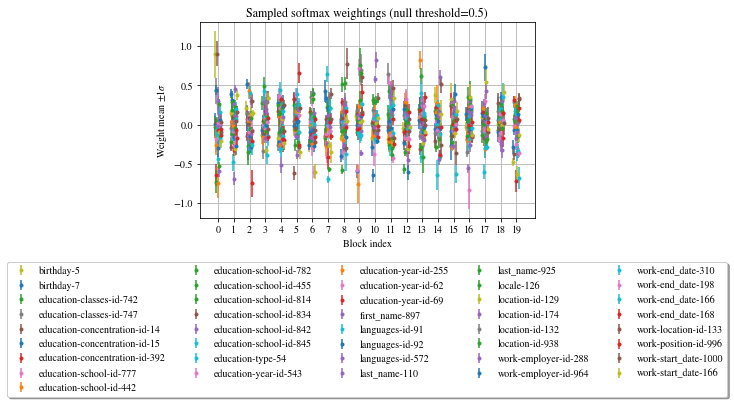

In [21]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0.5, legend=True)